<center><h1>Decision_Trees</h1></center>

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression , RidgeCV , LassoCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import _tree, DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
df = pd.read_csv(
    filepath_or_buffer='../../data/Accute_Inflamations/diagnosis.data', 
    encoding='utf-16', 
    sep='\t', 
    decimal=",",
    names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation','Nephritis'],
    )
df

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### (b) Build a decision tree

*References*:

[DecisionTreeClassifier Doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Doc for tree_ structure](https://scikit-learn.org/dev/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

[Text(0.4444444444444444, 0.875, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2222222222222222, 0.625, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6666666666666666, 0.625, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]')]

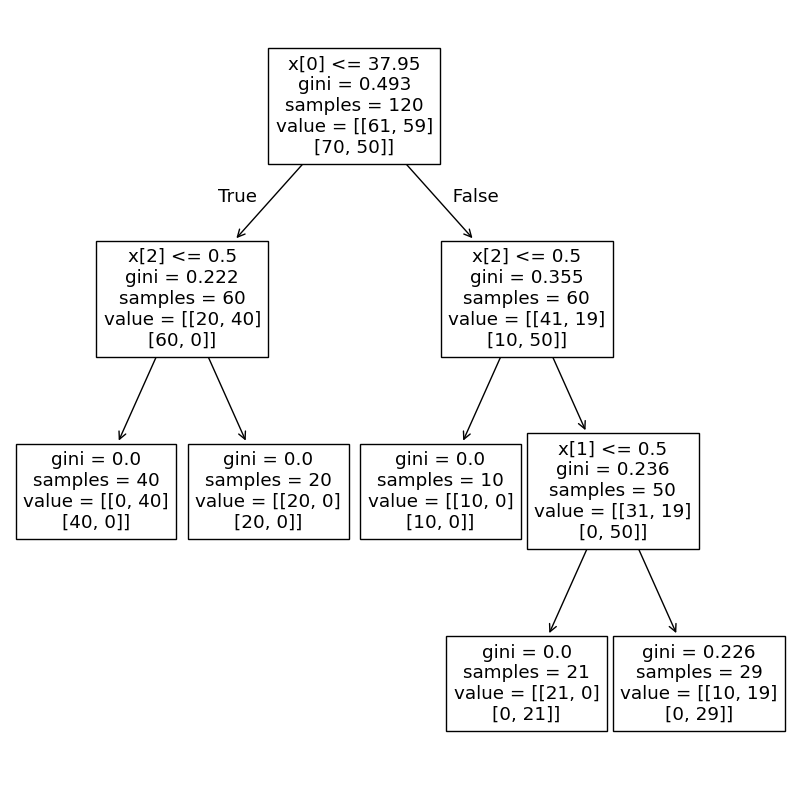

In [3]:
# 2 labels as a whole
df = df.replace({'yes': 1, 'no': 0}) 
Xs = df.iloc[:, 0: 6]
Ys = df.iloc[:, -2 :]
model = tree.DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(Xs, Ys)
plt.figure(figsize = (10,10))
tree.plot_tree(model)

[Text(0.4, 0.875, 'x[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 37.95\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

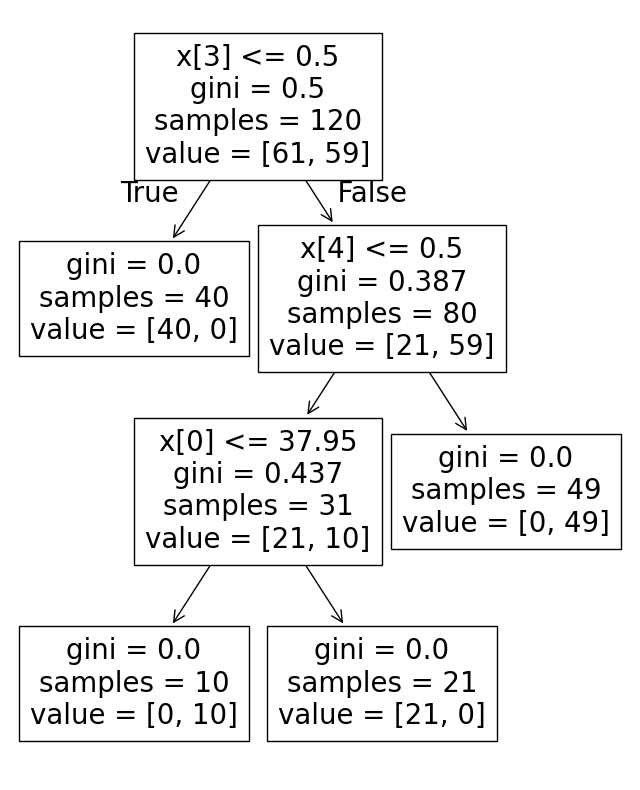

In [4]:
# label y = inflammation
y_imfla = df.iloc[:, -2 :-1]

model_infla = tree.DecisionTreeClassifier(max_leaf_nodes=5)
model_infla.fit(Xs, y_imfla)
plt.figure(figsize = (8,10))
tree.plot_tree(model_infla)

[Text(0.4, 0.8333333333333334, 'x[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

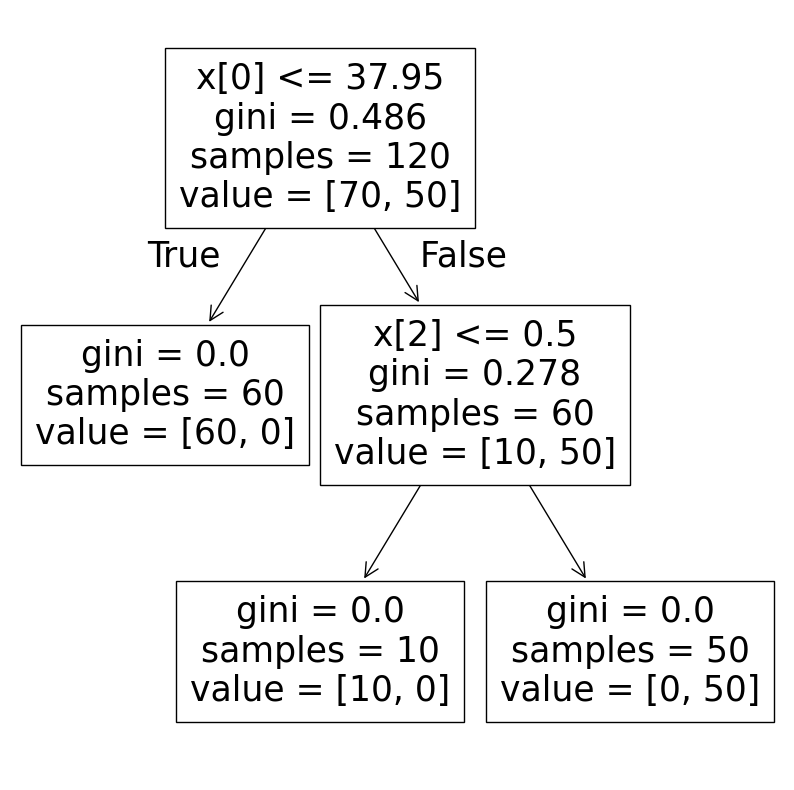

In [5]:
# label y = nephritis
y_nephritis = df.iloc[:, -1 :]

model_nephritis = tree.DecisionTreeClassifier(max_leaf_nodes=5)
model_nephritis.fit(Xs, y_nephritis)
plt.figure(figsize = (10,10))
tree.plot_tree(model_nephritis)

### (c) Convert the decision rules

In [6]:
def print_tree_code(tree, feature_names, y_labels):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            counts = tree_.value[node] * tree_.weighted_n_node_samples[node]
            if (y_labels in ["infla", "both"]):
                inflammation_counts = counts[0]
                print("{}return [{}],  # Inflammation [no, yes]"
                      .format(indent, inflammation_counts.tolist()))
            if (y_labels == "nephritis"):
                nephritis_counts = counts[0]
                print("{}return [{}]   # Nephritis [no, yes]"
                    .format(indent, nephritis_counts.tolist()))
            if (y_labels == "both"):
                nephritis_counts = counts[1]
                print("{}       [{}]   # Nephritis [no, yes]"
                    .format(indent, nephritis_counts.tolist()))
    recurse(0, 1)

feature_names = df.columns
print_tree_code(model, feature_names, y_labels="both")
print("\n================\n Tree Code for tree with inflammation label:\n")
print_tree_code(model_infla, feature_names, y_labels="infla")
print("\n================\n Tree Code for tree with nephritis label:\n")
print_tree_code(model_nephritis, feature_names, y_labels="nephritis")

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Temperature <= 37.95000076293945:
    if Lumbar <= 0.5:
      return [[0.0, 40.0]],  # Inflammation [no, yes]
             [[40.0, 0.0]]   # Nephritis [no, yes]
    else:  # if Lumbar > 0.5
      return [[20.0, 0.0]],  # Inflammation [no, yes]
             [[20.0, 0.0]]   # Nephritis [no, yes]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.0, 0.0]],  # Inflammation [no, yes]
             [[10.0, 0.0]]   # Nephritis [no, yes]
    else:  # if Lumbar > 0.5
      if Nausea <= 0.5:
        return [[21.0, 0.0]],  # Inflammation [no, yes]
               [[0.0, 21.0]]   # Nephritis [no, yes]
      else:  # if Nausea > 0.5
        return [[10.0, 19.0]],  # Inflammation [no, yes]
               [[0.0, 29.0]]   # Nephritis [no, yes]

 Tree Code for tree with inflammation label:

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nep

### (d) Cost complexity pruning

*References*:

[GridsearchCV Doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[A practical approach to Tree Pruning using sklearn | Decision Trees](https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/)

Text(0.5, 1.0, 'Total Impurity VS. effective α in training set')

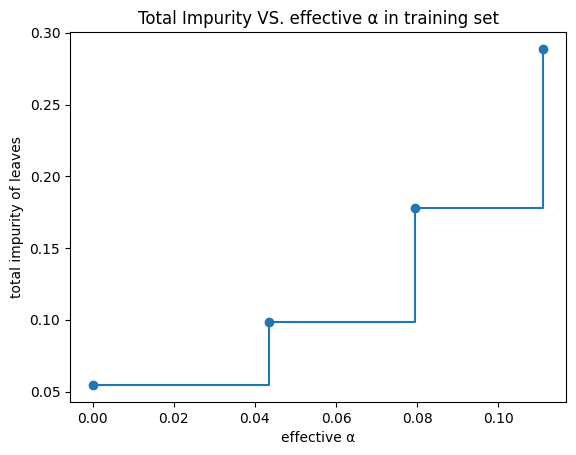

In [7]:
path = model.cost_complexity_pruning_path(Xs, Ys)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective α")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity VS. effective α in training set")

We should use cross validation to find the value of α to prune the tree.

In [8]:
gridSearch = GridSearchCV(model, cv = 5, param_grid={'ccp_alpha': ccp_alphas, 'random_state':[100]}, scoring='accuracy')
gridSearch.fit(Xs, Ys)
results = gridSearch.cv_results_

# print the results
df_results = pd.DataFrame({
    "alphas": results["param_ccp_alpha"],
    "scores": results["mean_test_score"],
    "std": results["std_test_score"]
})
df_results

,alphas,scores,std
0,0.000000,0.866667,0.113039
1,0.043569,0.741667,0.247768
2,0.079472,0.708333,0.260875
3,0.111111,0.566667,0.140929
4,0.204236,0.200000,0.209828


The alpha with best score is 0.0. That means the tree is unpruned like above. Therefore I choose the second one **α = 0.079472**

[Text(0.5, 0.8333333333333334, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.25, 0.5, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]')]

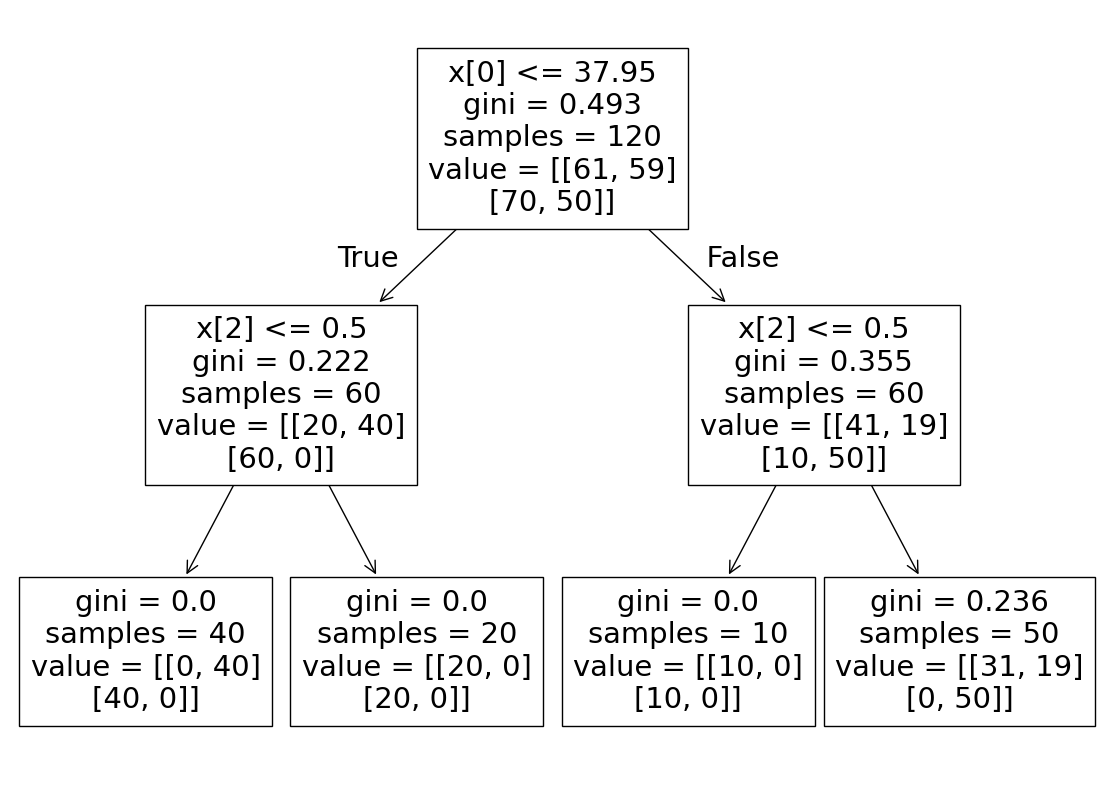

In [9]:
pruned_model = tree.DecisionTreeClassifier(ccp_alpha=0.079472)
pruned_model = pruned_model.fit(Xs, Ys)
plt.figure(figsize = (14,10))
tree.plot_tree(pruned_model)

In [10]:
print_tree_code(pruned_model, feature_names, y_labels="both")

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Temperature <= 37.95000076293945:
    if Lumbar <= 0.5:
      return [[0.0, 40.0]],  # Inflammation [no, yes]
             [[40.0, 0.0]]   # Nephritis [no, yes]
    else:  # if Lumbar > 0.5
      return [[20.0, 0.0]],  # Inflammation [no, yes]
             [[20.0, 0.0]]   # Nephritis [no, yes]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.0, 0.0]],  # Inflammation [no, yes]
             [[10.0, 0.0]]   # Nephritis [no, yes]
    else:  # if Lumbar > 0.5
      return [[31.0, 19.0]],  # Inflammation [no, yes]
             [[0.0, 50.0]]   # Nephritis [no, yes]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [11]:
df = pd.read_csv(
    filepath_or_buffer='../../data/Accute_Inflamations/communities.data', 
    names=['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medfamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop'], 
    na_values="?")
df_train = df[:1495]
df_test = df[1495:]
df_train

# train and test set split is not used in this stage.
# It is better to do 

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85.0,49056.0,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


### (b) Missing values

The data description mentions some features are nonpredictive. Ignore those features.

*References*:

Lecture 3 Slides Page 162

[handle-missing-data-python](https://machinelearningmastery.com/handle-missing-data-python/)

In [12]:
# Remove the first 5 columns
df = df.iloc[:, 5:]
df_train = df_train.iloc[:,5:]
df_test = df_test.iloc[:,5:]

# Imputation for training set
# Print initial missing values count
print("Initial missing values in training set:")
print(df_train.isnull().sum())
# retrieve the numpy array
values = df_train.values
# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(f'\nMissing: {np.isnan(transformed_values).sum()}')
# store imputed values back into df_train
df_train = pd.DataFrame(imputer.transform(df_train), columns = df_train.columns)

# Imputation for test set
values = df_test.values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imputer.fit_transform(values)
df_test = pd.DataFrame(imputer.transform(df_test), columns = df_test.columns)

# Imputation for the whole data without splitting ( NOT used)
# values = df.values
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transformed_values = imputer.fit_transform(values)
# df = pd.DataFrame(imputer.transform(df), columns = df.columns)

Initial missing values in training set:
population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
                       ... 
LemasPctPolicOnPatr    1256
LemasGangUnitDeploy    1256
LemasPctOfficDrugUn       0
PolicBudgPerPop        1256
ViolentCrimesPerPop       0
Length: 123, dtype: int64

Missing: 0


### (c) Plot a correlation matrix

*References*:

[Plotting Correlation Matrix using Python](https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/)

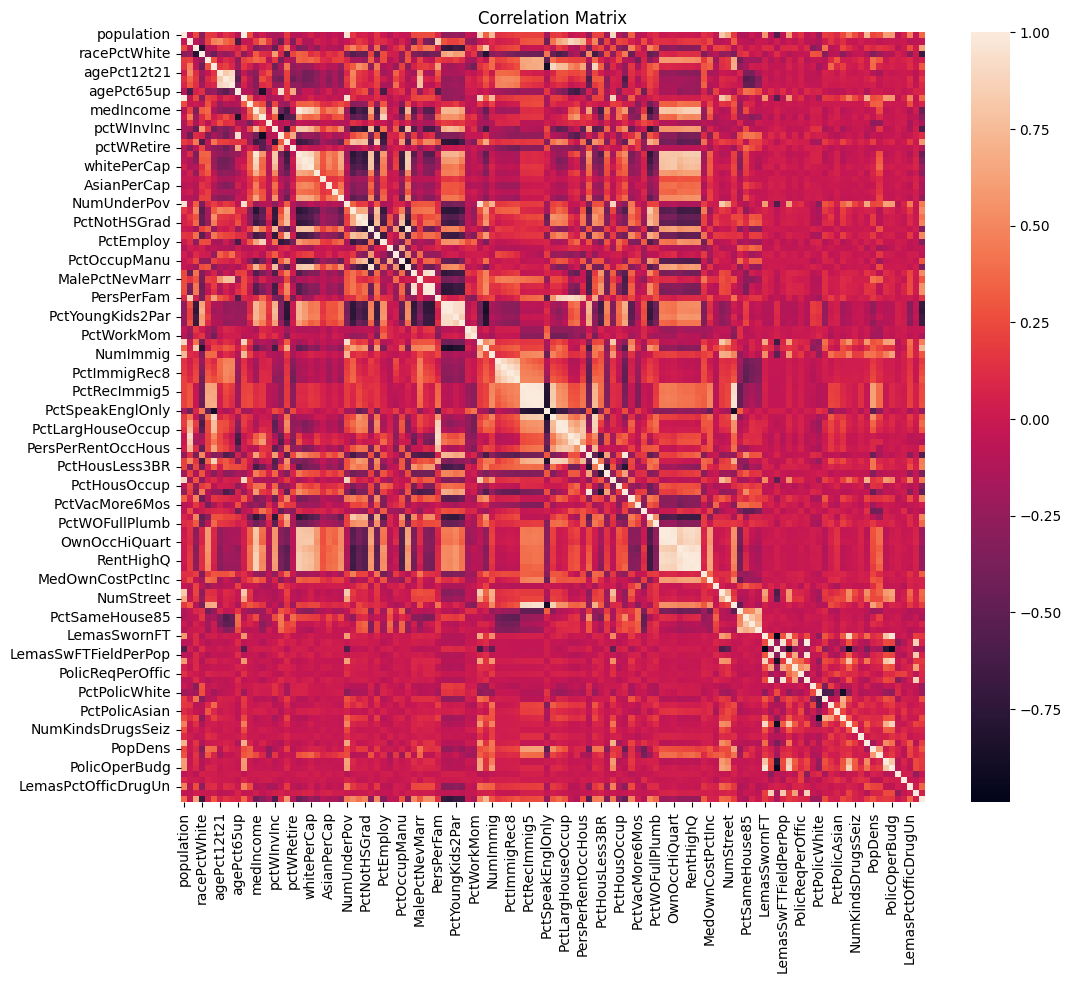

In [13]:
# After imputation, concatenate Train and test set together
df = pd.concat([df_train, df_test])

# correlation matrix
correlation_matrix = df.corr()

#plotting the heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix")
plt.show()

### (d) Calculate the Coefficient of Variation CV

Calculate the Coefficient of Variation $CV$ for each feature, where $CV = \frac{s}{m}$, in which $s$ is sample standard deviation and $m$ is sample mean.

In [ ]:
def calculate_coef_of_Variation(df):
    Xs = df.iloc[:, :-1]    # all the features
    summary = Xs.describe()
    CV = summary.loc['std']/summary.loc['mean']
    print(CV)
    return CV

# Calculation on the entire data set
print("Result for whole data:")
CV = calculate_coef_of_Variation(df)
# Calculation on the Training data set
print("\nResult for Training data:")
calculate_coef_of_Variation(df_train)
# Calculation on the Test data set
print("\nResult for Test data:")
calculate_coef_of_Variation(df_test)

Result for whole data:
population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
PolicOperBudg          0.734216
LemasPctPolicOnPatr    0.126642
LemasGangUnitDeploy    0.370311
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.339119
Length: 122, dtype: float64

Result for Training data:
population             2.241105
householdsize          0.355800
racepctblack           1.428885
racePctWhite           0.330213
racePctAsian           1.359100
                         ...   
PolicOperBudg          0.743487
LemasPctPolicOnPatr    0.115739
LemasGangUnitDeploy    0.362989
LemasPctOfficDrugUn    2.552946
PolicBudgPerPop        0.326026
Length: 122, dtype: float64

Result for Test data:
population             2.077145
householdsize          0.346017
racepctblack           1.356525
racePctWhite           0.304182
racePctAsian           1.360714
       

population             2.077145
householdsize          0.346017
racepctblack           1.356525
racePctWhite           0.304182
racePctAsian           1.360714
                         ...   
PolicOperBudg          0.645044
LemasPctPolicOnPatr    0.139802
LemasGangUnitDeploy    0.382850
LemasPctOfficDrugUn    2.563248
PolicBudgPerPop        0.362543
Length: 122, dtype: float64

### (e) Scatter plots and box plots for highest CV features

Pick $\lfloor \sqrt{128} \rfloor$ features with highest $CV$, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [15]:
# m: number of features to be selected
m = math.floor(math.sqrt(128))  # m = 11
top_features = CV.sort_values(ascending=False).head(m)
top_features

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
dtype: float64

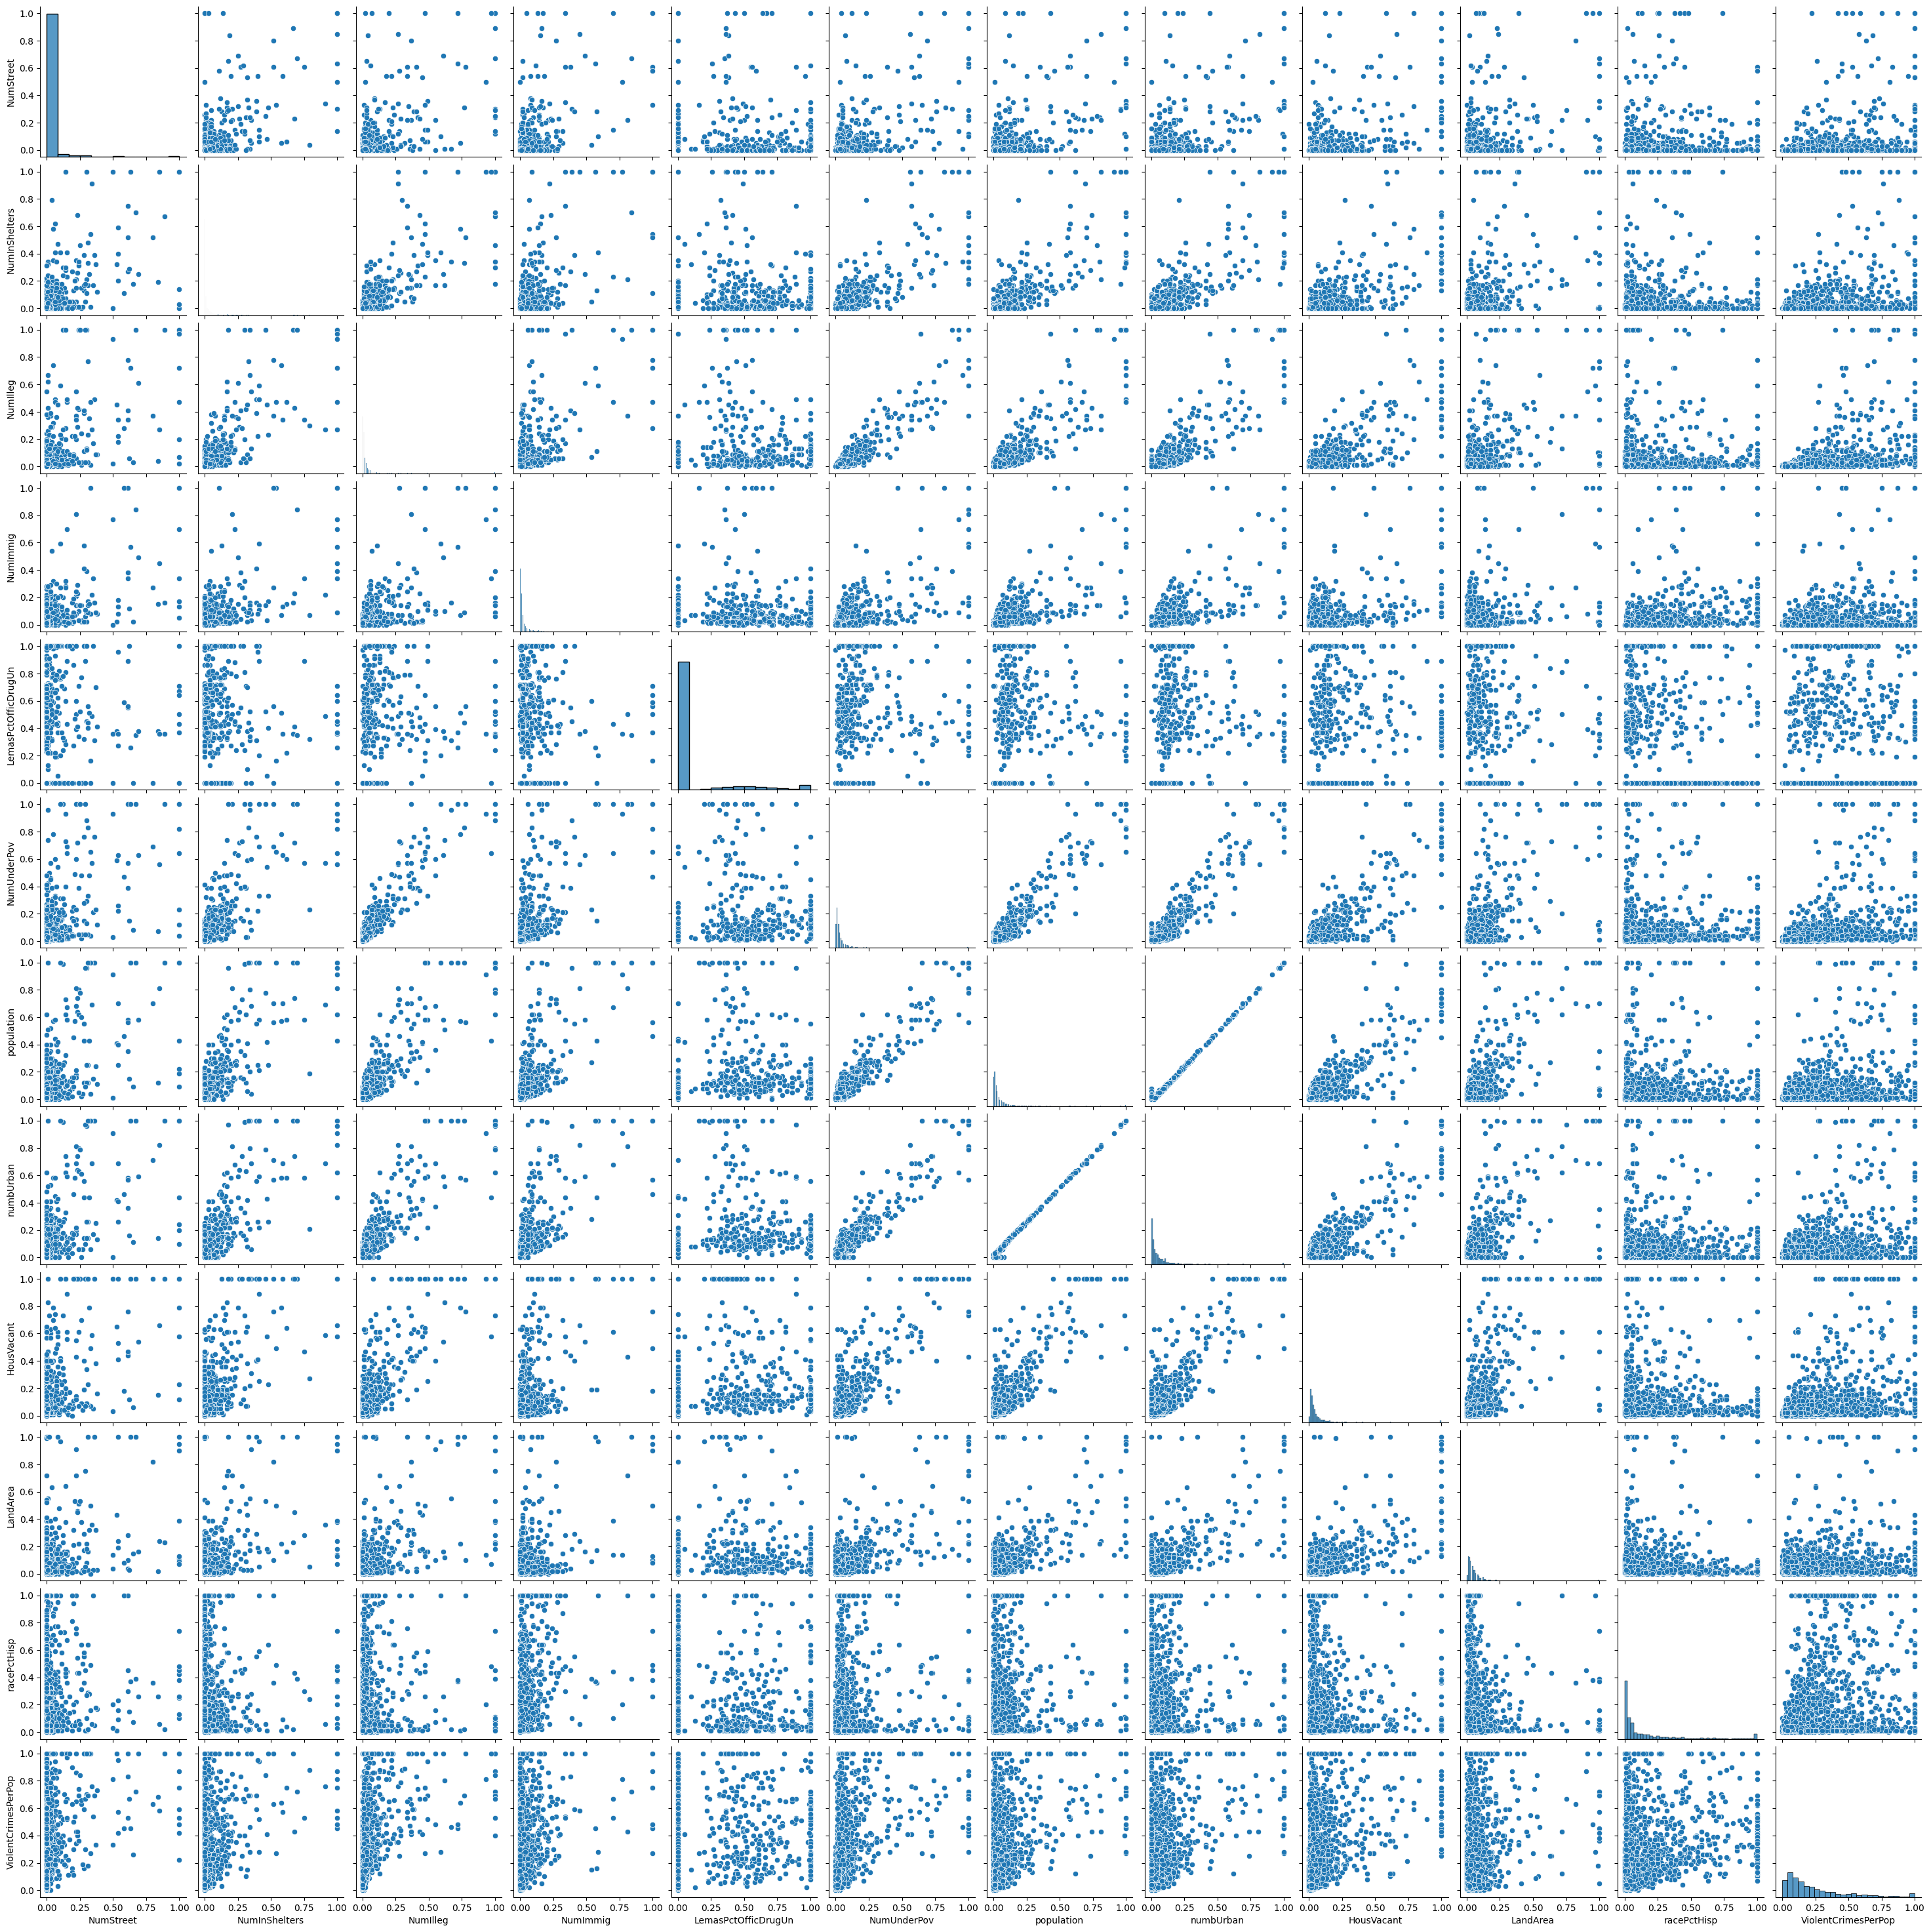

In [16]:
# make scatterplots
top_features = [*(top_features.index.tolist()), (df.columns[122])] 
    # the selected features and target concatenated together
df_top_m = df[top_features]
sns.pairplot(df_top_m)
# plt.title("scatterplots for Top 11 features")

From the scatter plots, we notice two variables (**numbUrban** and **population**) form a straight linear line starting from the origin and all the way to high y-value , which means they have **very strong positive correlation** with each other and are **redundant**. 

Correlation among other variables might exist, like **numbUrban** and **NumUnderPov**, **population** and **NumUnderPov**. But they are not as strong.

**Significance**:

The scatter plots for the 11 selected features and target variable does not show strong relationship. 

<Axes: >

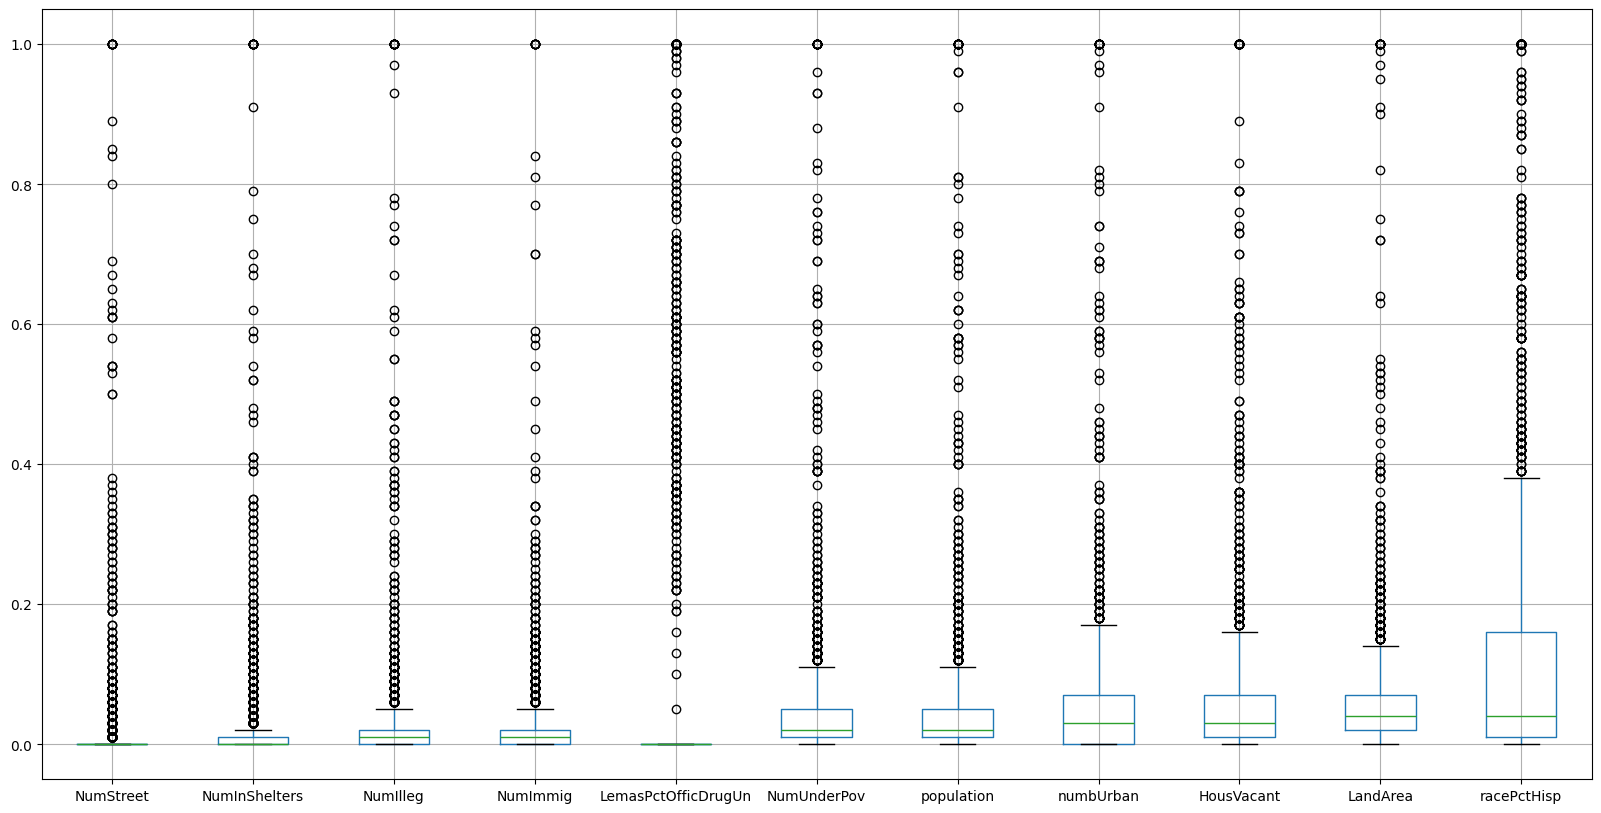

In [17]:
# make boxplot
plt.figure(figsize=(20, 10))
df_top_m.iloc[:, :-1].boxplot()

### (f) Fit a linear model

Fit a linear model using least squares to the training set and report the test error.

**Note**:

Here we are using training and test set imputed **after** splitting, because the best practice is to impute separately to avoid data leackage

In [18]:
# divide test and train
# df_train = df[:1495]
# df_test = df[1495:]

# Here we are using training and test set imputed AFTER splitting, 
# because the best practice is to impute separately to avoid data leackage
# divide X and y
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1:]

# fit linear model
# model_linear = LinearRegression().fit(X_train, y_train)
X_train_const = sm.add_constant(X_train)
model_linear = sm.OLS(y_train, X_train_const).fit()

# predict
X_test_const = sm.add_constant(X_test)
y_pred = model_linear.predict(X_test_const)

# MSE
MSE_linear = mean_squared_error(y_test, y_pred)
MSE_linear = round(float(MSE_linear), 4)
MSE_linear

0.0181

### (g) Fit a ridge regression model

Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

In [19]:
lambdas = [10**i for i in range(-2, 3)]
model_ridge = RidgeCV(alphas=lambdas, cv=5).fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
MSE_ridge = mean_squared_error(y_test, y_pred)
print("the best lambda from RidgeCV", model_ridge.alpha_)
print("MSE of ridge regression: ", MSE_ridge)
# Discovery: having a constant doesn't matter here

the best lambda from RidgeCV 1.0
MSE of ridge regression:  0.017723737122827776


### (h) Fit a LASSO model

In [20]:
def fit_lasso(X_train, y_train, X_test, y_test):    
    model_lasso = LassoCV(alphas=lambdas, cv = 5).fit(X_train, y_train)
    y_pred = model_lasso.predict(X_test)
    
    # report best lambda
    lasso_lambda = model_lasso.alpha_
    print("Best lambda for lassoCV is: ", lasso_lambda)
    # report MSE
    MSE_lasso = mean_squared_error(y_test, y_pred)
    print("MSE = ", MSE_lasso)
    # report selected variables
    selected_variables = []
    for i in range(len(model_lasso.coef_)):
        if(model_lasso.coef_[i] != 0):
            selected_variables.append([X_train.columns[i], round(float(model_lasso.coef_[i]), 4)])
    df_variables = pd.DataFrame(selected_variables, columns=["Variables", "Coef"])
    print("# of selected variables : ", len(selected_variables))
    display(df_variables)
    # print("Selected variables are :\n", selected_variables)

# Fit without standarzation
print("==============\n Lasso without standarzation:\n")
fit_lasso(X_train_const, y_train, X_test_const, y_test)
# Fit with standarzation
print("\n==============\n Lasso with standarzation:\n")
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train_const), columns=X_train_const.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test_const), columns=X_test_const.columns)
fit_lasso(X_train_std, y_train, X_test_std, y_test)


 Lasso without standarzation:

Best lambda for lassoCV is:  0.01
MSE =  0.020919681104181242
# of selected variables :  3


,Variables,Coef
0,racePctWhite,-0.1919
1,PctKids2Par,-0.2466
2,PctIlleg,0.2157



 Lasso with standarzation:

Best lambda for lassoCV is:  0.01
MSE =  0.017344654268160967
# of selected variables :  14


,Variables,Coef
0,racepctblack,0.0293
1,racePctWhite,-0.0232
2,pctUrban,0.0095
3,MalePctDivorce,0.0220
4,PctKids2Par,-0.0559
5,PctWorkMom,-0.0078
6,PctIlleg,0.0380
7,PctPersDenseHous,0.0269
8,HousVacant,0.0159
9,PctHousOccup,-0.0044


Looking at the reported MSE value above, the Lasso model with standardization performs better: **0.0209 > 0.0173**

### (i) Fit a PCR model

**References**:

[RepeatedKFold Doc](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.RepeatedKFold.html)

I choose to skip this 

### (j) Fit a boosting tree

**References**:

[xgboost.XGBRegressor Doc](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)

[XGBoost for Regression](https://machinelearningmastery.com/xgboost-for-regression/)

In [23]:
alphas = [i for i in range(0, 11)]

# def choose_best_alpha(X, y):
# scores = []
# for alpha in alphas:

# Use GridSearchCV to search for best alpha
param_grid = {'reg_alpha': alphas, 'random_state':[42]}
boost_regressor = xgb.XGBRegressor(verbosity=0)
gridSearch = GridSearchCV(boost_regressor, param_grid, cv=5, scoring="neg_mean_squared_error")
gridSearch.fit(X_train, y_train)

# store results and show
results = gridSearch.cv_results_
gridSearch_alphas = results['param_reg_alpha']
gridSearch_score = -results['mean_test_score']
gridSearch_std = results['std_test_score']

df_result = pd.DataFrame({'alpha': gridSearch_alphas, 'mse': gridSearch_score, 'std': gridSearch_std})
df_result = df_result.sort_values(['mse'], ascending = True)
display(df_result)

,alpha,mse,std
4,4,0.020984,0.002825
6,6,0.021202,0.003018
7,7,0.021395,0.002370
2,2,0.021417,0.002723
3,3,0.021540,0.002986
1,1,0.021596,0.003114
8,8,0.021780,0.002685
5,5,0.021962,0.002719
9,9,0.022423,0.002865
10,10,0.022433,0.002833


We get the lowest MSE(0.020984) When **alpha = 4**

# References


[DecisionTreeClassifier Doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Doc for tree_ structure](https://scikit-learn.org/dev/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)


[GridsearchCV Doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[A practical approach to Tree Pruning using sklearn | Decision Trees](https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/)

Lecture 3 Slides Page 162

[handle-missing-data-python](https://machinelearningmastery.com/handle-missing-data-python/)


[Plotting Correlation Matrix using Python](https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/)

[xgboost.XGBRegressor Doc](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)

[XGBoost for Regression](https://machinelearningmastery.com/xgboost-for-regression/)